In [1]:
from sys import argv, exit
import multiprocessing as mp
import pandas as pd
from gensim.models.doc2vec import Doc2Vec
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
%matplotlib notebook

dataset = '../dados/articles.csv'
atributo =  'title'
caminho_modelo = 'modelos/doc2vec.title'

In [2]:
df = pd.read_csv(dataset)
df.columns

Index(['title', 'text', 'date', 'category', 'subcategory', 'link'], dtype='object')

In [79]:
df.sample(frac=0.01)['date']
df.sort_values(by=['date'])
df.head()

,title,text,date,category,subcategory,link
0,"Lula diz que está 'lascado', mas que ainda tem...",Com a possibilidade de uma condenação impedir ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
1,"'Decidi ser escrava das mulheres que sofrem', ...","Para Oumou Sangaré, cantora e ativista malines...",2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
2,Três reportagens da Folha ganham Prêmio Petrob...,Três reportagens da Folha foram vencedoras do ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
3,Filme 'Star Wars: Os Últimos Jedi' ganha trail...,A Disney divulgou na noite desta segunda-feira...,2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
4,CBSS inicia acordos com fintechs e quer 30% do...,"O CBSS, banco da holding Elopar dos sócios Bra...",2017-09-10,mercado,NaN,http://www1.folha.uol.com.br/mercado/2017/10/1...


In [3]:
intervalos = {}
for index, row in df.iterrows():
    tokens = row['date'].split('-')
    dia = int(tokens[2])
    chave = tokens[0]+'-'+tokens[1]+'-i'
    if dia <= 7:
        chave += '_1'
    elif dia <= 14:
        chave += '_2'
    elif dia <= 21:
        chave += '_3'
    else:
        chave += '_4'
    if chave not in intervalos:
        intervalos[chave] = list()
    intervalos[chave].append(index)

<IPython.core.display.Javascript object>


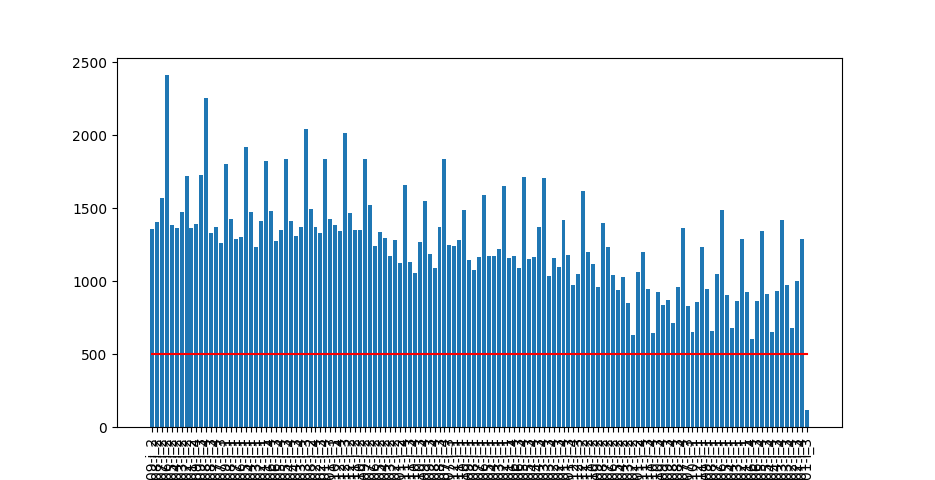

In [5]:
fig, ax = plt.subplots()
yaxis = list()
chaves = list(intervalos.keys())
chaves.sort()
for chave in chaves:
    yaxis.append(len(intervalos[chave]))

xaxis = list(intervalos.keys())
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.bar(xaxis, yaxis)
const = [500] * len(xaxis)
ax.plot(xaxis, const, 'r')

In [53]:
modelo = Doc2Vec.load(caminho_modelo)

In [73]:
pt = open('distancias.txt','w')
chaves = list(intervalos.keys())
chaves.sort()
for i in range(0, len(chaves)-1):
    # Comparando os documentos de uma semana com a próxima.
    for doc in intervalos[chaves[i]]:
        d1 = 'DOC_'+str(doc)
        for doc_viz in intervalos[chaves[i+1]]:
            d2 = 'DOC_'+str(doc_viz)
            #print(d1, d2, cosine_similarity([modelo[d1]], [modelo[d2]])[0])
            distancia = cosine_similarity([modelo[d1]], [modelo[d2]])[0][0]
            pt.write(str(doc)+','+str(doc_viz)+','+str(distancia)+'\n')
pt.close()
            
        

KeyboardInterrupt: 